In [ ]:
# importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from PIL import Image
from sklearn.metrics import accuracy_score

In [ ]:
pneumonia_path = "/Users/anargh/Downloads/chest_xray"
tbx11k_path = "/Users/anargh/Downloads/TBX11K/imgs"
# TBX11K dataset categories
tbx11k_categories = ["health", "sick", "tb"]

pneumonia_splits = ["train", "test"]
pneumonia_categories = ["NORMAL", "PNEUMONIA"]

# Loading TBX11K dataset images
tbx11k_files = {category: os.listdir(os.path.join(tbx11k_path, category)) for category in tbx11k_categories}

# Loading Pneumonia dataset images
pneumonia_files = {split: {} for split in pneumonia_splits}
for split in pneumonia_splits:
    for category in pneumonia_categories:
        folder_path = os.path.join(pneumonia_path, split, category)
        images = os.listdir(folder_path)

        # Classify PNEUMONIA images into BACTERIA or VIRUS
        if category == "PNEUMONIA":
            bacterial = [img for img in images if "BACTERIA" in img]
            viral = [img for img in images if "VIRUS" in img]
            pneumonia_files[split]["BACTERIAL PNEUMONIA"] = bacterial
            pneumonia_files[split]["VIRAL PNEUMONIA"] = viral
        else:
            pneumonia_files[split]["NORMAL"] = images

In [ ]:
print("\nTBX11K Dataset:")
for category, files in tbx11k_files.items():
    print(f"  - {category}: {len(files)} images")

print("\nPneumonia Dataset:")
for split, categories in pneumonia_files.items():
    print(f"  {split.upper()}:")
    for category, files in categories.items():
        print(f"    - {category}: {len(files)} images")


TBX11K Dataset:
  - health: 3801 images
  - sick: 3801 images
  - tb: 2539 images

Pneumonia Dataset:
  TRAIN:
    - NORMAL: 2539 images
    - BACTERIAL PNEUMONIA: 2539 images
    - VIRAL PNEUMONIA: 2538 images
  TEST:
    - NORMAL: 234 images
    - BACTERIAL PNEUMONIA: 242 images
    - VIRAL PNEUMONIA: 148 images


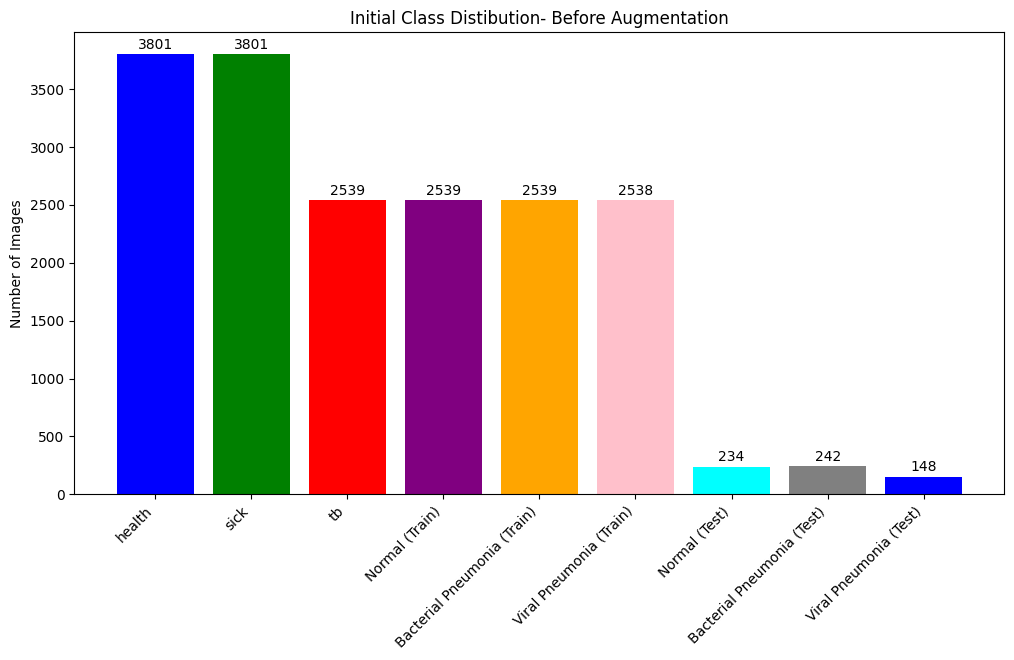

In [ ]:
tbx_counts = {category: len(files) for category, files in tbx11k_files.items()}

pneumonia_counts = {
    "Normal (Train)": len(pneumonia_files["train"]["NORMAL"]),
    "Bacterial Pneumonia (Train)": len(pneumonia_files["train"]["BACTERIAL PNEUMONIA"]),
    "Viral Pneumonia (Train)": len(pneumonia_files["train"]["VIRAL PNEUMONIA"]),
    "Normal (Test)": len(pneumonia_files["test"]["NORMAL"]),
    "Bacterial Pneumonia (Test)": len(pneumonia_files["test"]["BACTERIAL PNEUMONIA"]),
    "Viral Pneumonia (Test)": len(pneumonia_files["test"]["VIRAL PNEUMONIA"]),
}

# Merge all class distributions
all_counts = {**tbx_counts, **pneumonia_counts}

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(all_counts.keys(), all_counts.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'gray'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Images")
plt.title("Initial Class Distribution - Before Augmentation")

# Show values on bars
for i, v in enumerate(all_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)
plt.title("Initial Class Distibution- Before Augmentation")
plt.show()

/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/3525401278.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tbx_im = imageio.imread(tbx_sample)
/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/3525401278.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  normal_im = imageio.imread(normal_sample)
/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/3525401278.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappea

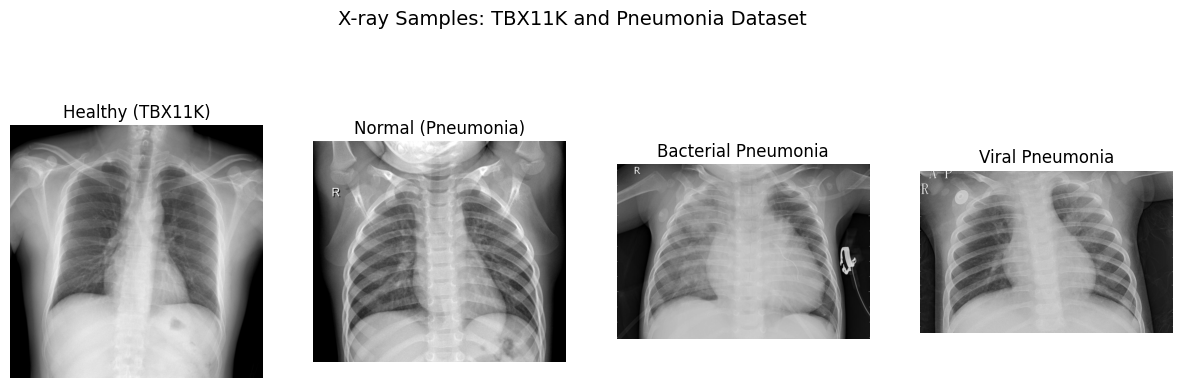

In [ ]:
# Define paths for sample images
tbx_sample = os.path.join(tbx11k_path, "health", os.listdir(os.path.join(tbx11k_path, "health"))[0])  # A healthy sample
normal_sample = os.path.join(pneumonia_path, "train/NORMAL", os.listdir(os.path.join(pneumonia_path, "train/NORMAL"))[0])  # A normal sample
bacterial_sample = os.path.join(pneumonia_path, "train/PNEUMONIA", [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "BACTERIA" in img][0])  # A bacterial pneumonia sample
viral_sample = os.path.join(pneumonia_path, "train/PNEUMONIA", [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "VIRUS" in img][0])  # A viral pneumonia sample

# Read images
tbx_im = imageio.imread(tbx_sample)
normal_im = imageio.imread(normal_sample)
bacterial_im = imageio.imread(bacterial_sample)
viral_im = imageio.imread(viral_sample)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(tbx_im, cmap="gray")
axes[0].set_title("Healthy (TBX11K)")

axes[1].imshow(normal_im, cmap="gray")
axes[1].set_title("Normal (Pneumonia)")

axes[2].imshow(bacterial_im, cmap="gray")
axes[2].set_title("Bacterial Pneumonia")

axes[3].imshow(viral_im, cmap="gray")
axes[3].set_title("Viral Pneumonia")

for ax in axes:
    ax.axis("off")

plt.suptitle("X-ray Samples: TBX11K and Pneumonia Dataset", fontsize=14)
plt.show()


/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/2606294421.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(bacterial_sample)


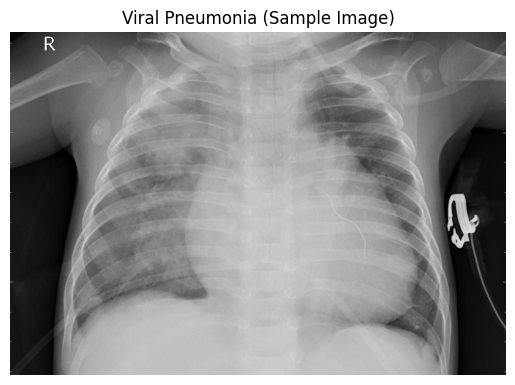

In [ ]:
bacteial_sample = os.path.join(pneumonia_path, "train/PNEUMONIA", [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "VIRUS" in img][0])

# Load the image
image = imageio.imread(bacterial_sample)

# Display the image
plt.imshow(image, cmap="gray")  # Assuming X-ray images are grayscale
plt.axis("off")  # Hide axis
plt.title("Viral Pneumonia (Sample Image)")
plt.show()

/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/4000163290.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(bacterial_sample)


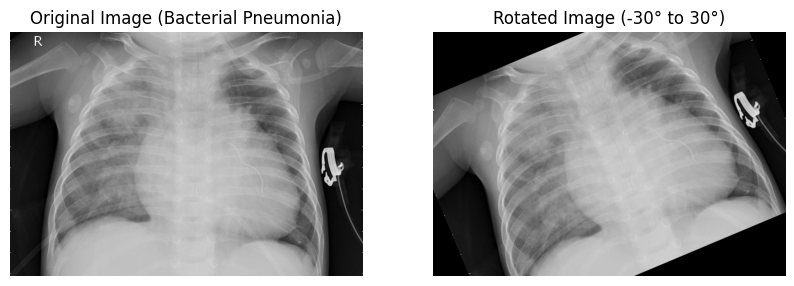

In [ ]:
bacterial_sample = os.path.join(
    pneumonia_path,
    "train/PNEUMONIA",
    [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "BACTERIA" in img][0]
)

# Load the image
image = imageio.imread(bacterial_sample)

# Define the rotation augmenter (-30° to 30°)
rotate = iaa.Affine(rotate=(-30, 30))

# Apply the augmentation
rotated_image = rotate.augment_image(image)

# Plot the original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image (Bacterial Pneumonia)")
axes[0].axis("off")

# Rotated Image
axes[1].imshow(rotated_image, cmap="gray")
axes[1].set_title("Rotated Image (-30° to 30°)")
axes[1].axis("off")

plt.show()


/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/509110455.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(bacterial_sample)


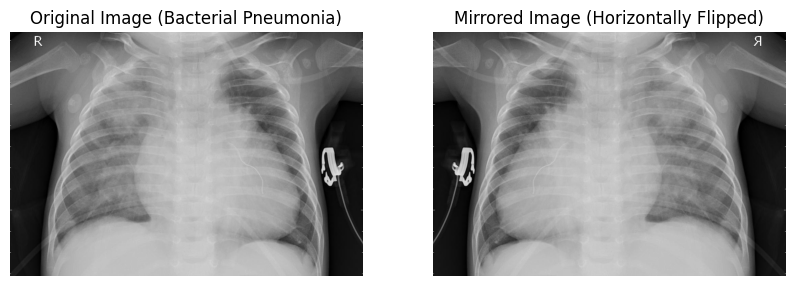

In [ ]:
bacterial_sample = os.path.join(
    pneumonia_path,
    "train/PNEUMONIA",
    [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "BACTERIA" in img][0]
)

# Load the image
image = imageio.imread(bacterial_sample)

# Create a mirrored (horizontally flipped) image
mirrored_image = image[:, ::-1]

# Plot the original and mirrored images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image (Bacterial Pneumonia)")
axes[0].axis("off")

# Mirrored Image
axes[1].imshow(mirrored_image, cmap="gray")
axes[1].set_title("Mirrored Image (Horizontally Flipped)")
axes[1].axis("off")

plt.show()


/var/folders/t3/s0yp_3yd0cs9dv7h3gqjlk1r0000gn/T/ipykernel_39247/2296333764.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(bacterial_sample)


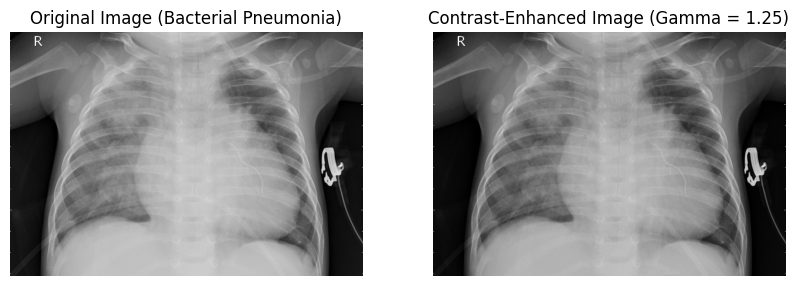

In [ ]:
bacterial_sample = os.path.join(
    pneumonia_path,
    "train/PNEUMONIA",
    [img for img in os.listdir(os.path.join(pneumonia_path, "train/PNEUMONIA")) if "BACTERIA" in img][0]
)

# Load the image
image = imageio.imread(bacterial_sample)

# Apply contrast augmentation (Gamma Contrast)
contrast = iaa.GammaContrast(gamma=1.25)
contrast_image = contrast.augment_image(image)

# Plot the original and contrast-enhanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image (Bacterial Pneumonia)")
axes[0].axis("off")

# Contrast-Enhanced Image
axes[1].imshow(contrast_image, cmap="gray")
axes[1].set_title("Contrast-Enhanced Image (Gamma = 1.25)")
axes[1].axis("off")

plt.show()

In [ ]:
import os

def remove_augmentations():
    tb_path = "/Users/anargh/Downloads/TBX11K/imgs/tb"
    normal_path = "/Users/anargh/Downloads/chest_xray/train/NORMAL"
    pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"

    def delete_augmented_files(folder_path):
        initial_count = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"\nStarting cleanup for {os.path.basename(folder_path)}")
        print(f"Initial count: {initial_count}")

        # Keywords that identify augmented images
        aug_keywords = ['_mirrored', '_contrast_110', '_contrast_120', '_brightness',
                       '_rotated_10', '_rotated_-10', '_rotated_20', '_rotated_-20',
                       '_contrast_90', '_rotated_30', '_rotated_-30']

        deleted_count = 0
        for filename in os.listdir(folder_path):
            if any(keyword in filename for keyword in aug_keywords):
                try:
                    file_path = os.path.join(folder_path, filename)
                    os.remove(file_path)
                    deleted_count += 1
                except Exception as e:
                    print(f"Error deleting {filename}: {str(e)}")

        final_count = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"Deleted {deleted_count} augmented images")
        print(f"Final count: {final_count}")
        return deleted_count

    # Remove augmentations from each folder
    total_deleted = 0

    print("Starting cleanup process...")

    # Clean TB folder
    total_deleted += delete_augmented_files(tb_path)

    # Clean Normal folder
    total_deleted += delete_augmented_files(normal_path)

    # Clean Pneumonia folder (both bacterial and viral)
    total_deleted += delete_augmented_files(pneumonia_path)

    print(f"\nTotal augmented images removed: {total_deleted}")

    # Print final distribution
    print("\nFinal class distribution:")
    tb_final = len([f for f in os.listdir(tb_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    normal_final = len([f for f in os.listdir(normal_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    pneumonia_files = [f for f in os.listdir(pneumonia_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    bacterial_final = len([f for f in pneumonia_files if "BACTERIA" in f])
    viral_final = len([f for f in pneumonia_files if "VIRUS" in f])

    print(f"TB: {tb_final}")
    print(f"Normal: {normal_final}")
    print(f"Bacterial Pneumonia: {bacterial_final}")
    print(f"Viral Pneumonia: {viral_final}")

# Run the cleanup
remove_augmentations()

Starting cleanup process...

Starting cleanup for tb
Initial count: 3852
Deleted 3052 augmented images
Final count: 800

Starting cleanup for NORMAL
Initial count: 1575
Deleted 226 augmented images
Final count: 1349

Starting cleanup for PNEUMONIA
Initial count: 3883
Deleted 0 augmented images
Final count: 3883

Total augmented images removed: 3278

Final class distribution:
TB: 800
Normal: 1349
Bacterial Pneumonia: 2538
Viral Pneumonia: 1345


In [ ]:
import os
import cv2
import random  # Added this import
import imageio
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image  # Adding PIL for additional image handling support

def augment_and_save(folder, file_list, target_count, current_total, class_name):
    additional_needed = target_count - current_total

    print(f"\nStarting augmentation for {class_name}")
    print(f"Current count: {current_total}")
    print(f"Additional needed: {additional_needed}")

    if additional_needed <= 0:
        print("No augmentation needed")
        return

    augmentations = [
        ("_mirrored", lambda img: cv2.flip(img, 1)),
        ("_contrast_110", lambda img: iaa.GammaContrast(gamma=1.1).augment_image(img)),
        ("_contrast_120", lambda img: iaa.GammaContrast(gamma=1.2).augment_image(img)),
        ("_brightness", lambda img: iaa.Multiply((0.8, 1.2)).augment_image(img)),
        ("_rotated_10", lambda img: iaa.Affine(rotate=10).augment_image(img)),
        ("_rotated_-10", lambda img: iaa.Affine(rotate=-10).augment_image(img)),
        ("_rotated_20", lambda img: iaa.Affine(rotate=20).augment_image(img)),
        ("_rotated_-20", lambda img: iaa.Affine(rotate=-20).augment_image(img)),
        ("_contrast_90", lambda img: iaa.GammaContrast(gamma=0.9).augment_image(img)),
        ("_rotated_30", lambda img: iaa.Affine(rotate=30).augment_image(img)),
        ("_rotated_-30", lambda img: iaa.Affine(rotate=-30).augment_image(img))
    ]

    augmentations_created = 0

    while augmentations_created < additional_needed:
        for file in file_list:
            if not file.endswith((".png", ".jpg", ".jpeg")):
                continue

            if augmentations_created >= additional_needed:
                break

            try:
                filepath = os.path.join(folder, file)
                image = cv2.imread(filepath)

                if image is None:
                    print(f"Failed to read image: {filepath}")
                    continue

                # Randomly choose augmentation
                aug_name, aug_func = random.choice(augmentations)

                # Apply augmentation
                augmented_image = aug_func(image)

                # Generate unique filename
                base_name = os.path.splitext(file)[0]
                new_filename = f"{base_name}{aug_name}_{random.randint(1000, 9999)}.png"
                output_path = os.path.join(folder, new_filename)

                # Save augmented image
                cv2.imwrite(output_path, augmented_image)

                augmentations_created += 1

                if augmentations_created % 100 == 0:
                    print(f"Created {augmentations_created} augmentations...")

            except Exception as e:
                print(f"Error processing {file}: {str(e)}")
                continue

    final_count = len([f for f in os.listdir(folder) if f.endswith((".png", ".jpg", ".jpeg"))])
    print(f"Final count for {class_name}: {final_count}")

# Define paths
normal_path = "/Users/anargh/Downloads/chest_xray/train/NORMAL"
bacterial_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"
viral_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"
tb_path = "/Users/anargh/Downloads/TBX11K/imgs/tb"

# Current counts
tb_count = 800
normal_count = 1349
bacterial_count = 2538
viral_count = 1345

# Calculate target count (maximum 4500, but will use the largest class as ceiling)
target_count = min(4500, bacterial_count)  # Using bacterial count as it's the largest

print(f"Target count per class: {target_count}")

# Get file lists
tb_files = [f for f in os.listdir(tb_path) if f.endswith((".png", ".jpg", ".jpeg"))]
normal_files = [f for f in os.listdir(normal_path) if f.endswith((".png", ".jpg", ".jpeg"))]
bacterial_files = [f for f in os.listdir(bacterial_pneumonia_path)
                  if "BACTERIA" in f and f.endswith((".png", ".jpg", ".jpeg"))]
viral_files = [f for f in os.listdir(viral_pneumonia_path)
               if "VIRUS" in f and f.endswith((".png", ".jpg", ".jpeg"))]

# Augment all classes to match the target
augment_and_save(tb_path, tb_files, target_count, tb_count, "TB")
augment_and_save(normal_path, normal_files, target_count, normal_count, "Normal")
augment_and_save(viral_pneumonia_path, viral_files, target_count, viral_count, "Viral Pneumonia")

print("\nAugmentation complete. Checking final counts...")

# Print final distribution
final_tb = len([f for f in os.listdir(tb_path) if f.endswith((".png", ".jpg", ".jpeg"))])
final_normal = len([f for f in os.listdir(normal_path) if f.endswith((".png", ".jpg", ".jpeg"))])
final_pneumonia_files = [f for f in os.listdir(bacterial_pneumonia_path) if f.endswith((".png", ".jpg", ".jpeg"))]
final_bacterial = len([f for f in final_pneumonia_files if "BACTERIA" in f])
final_viral = len([f for f in final_pneumonia_files if "VIRUS" in f])

print("\nFinal class distribution:")
print(f"TB: {final_tb}")
print(f"Normal: {final_normal}")
print(f"Bacterial Pneumonia: {final_bacterial}")
print(f"Viral Pneumonia: {final_viral}")

Target count per class: 2538

Starting augmentation for TB
Current count: 800
Additional needed: 1738
Created 100 augmentations...
Created 200 augmentations...
Created 300 augmentations...
Created 400 augmentations...
Created 500 augmentations...
Created 600 augmentations...
Created 700 augmentations...
Created 800 augmentations...
Created 900 augmentations...
Created 1000 augmentations...
Created 1100 augmentations...
Created 1200 augmentations...
Created 1300 augmentations...
Created 1400 augmentations...
Created 1500 augmentations...
Created 1600 augmentations...
Created 1700 augmentations...
Final count for TB: 2538

Starting augmentation for Normal
Current count: 1349
Additional needed: 1189
Created 100 augmentations...
Created 200 augmentations...
Created 300 augmentations...
Created 400 augmentations...
Created 500 augmentations...
Created 600 augmentations...
Created 700 augmentations...
Created 800 augmentations...
Created 900 augmentations...
Created 1000 augmentations...
Cre

In [ ]:
import os

# Define dataset paths
tb_path = "/Users/anargh/Downloads/TBX11K/imgs/tb"
normal_path = "/Users/anargh/Downloads/chest_xray/train/NORMAL"
bacterial_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"
viral_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"

# Count files in each directory
print("TB:", len(os.listdir(tb_path)))
print("Normal:", len(os.listdir(normal_path)))
print("Bacterial Pneumonia:", len([f for f in os.listdir(bacterial_pneumonia_path) if "BACTERIA" in f]))
print("Viral Pneumonia:", len([f for f in os.listdir(viral_pneumonia_path) if "VIRUS" in f]))


TB: 2539
Normal: 2539
Bacterial Pneumonia: 2539
Viral Pneumonia: 2538


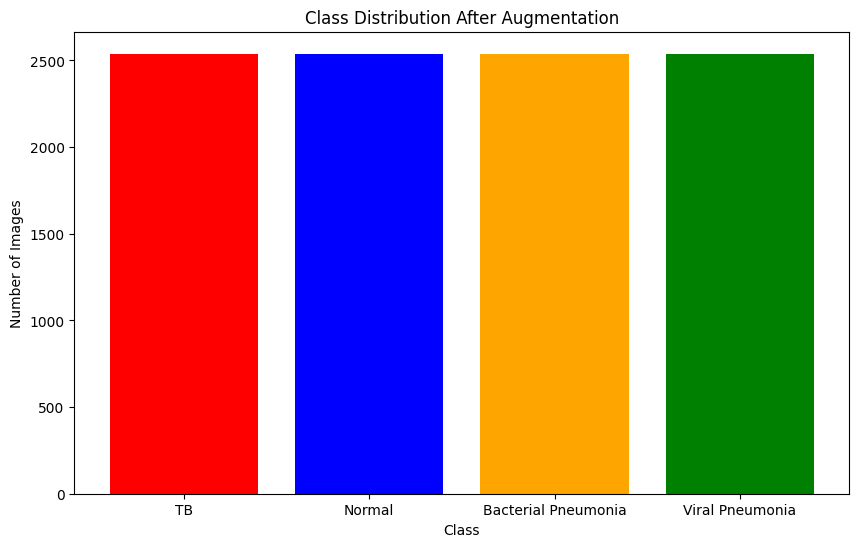

In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
tb_path = "/Users/anargh/Downloads/TBX11K/imgs/tb"
normal_path = "/Users/anargh/Downloads/chest_xray/train/NORMAL"
bacterial_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"
viral_pneumonia_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"

# Count the number of images in each class
tb_count = len(os.listdir(tb_path))
normal_count = len(os.listdir(normal_path))
bacterial_count = len([file for file in os.listdir(bacterial_pneumonia_path) if "BACTERIA" in file])
viral_count = len([file for file in os.listdir(viral_pneumonia_path) if "VIRUS" in file])

# Plot the class distribution
x_labels = ["TB", "Normal", "Bacterial Pneumonia", "Viral Pneumonia"]
y_values = [tb_count, normal_count, bacterial_count, viral_count]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color=["red", "blue", "orange", "green"])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution After Augmentation")

plt.show()


In [ ]:
import os

# Define dataset paths
tb_train_path = "/Users/anargh/Downloads/TBX11K/imgs/tb"
normal_train_path = "/Users/anargh/Downloads/chest_xray/train/NORMAL"
pneumonia_train_path = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA"

# Get all file names
tb_files = os.listdir(tb_train_path)
normal_files = os.listdir(normal_train_path)
bacterial_files = [f for f in os.listdir(pneumonia_train_path) if "BACTERIA" in f]
viral_files = [f for f in os.listdir(pneumonia_train_path) if "VIRUS" in f]

# Separate test set (first 40 images from each class)
tb_files_test = tb_files[:40]
normal_files_test = normal_files[:40]
bacterial_files_test = bacterial_files[:40]
viral_files_test = viral_files[:40]

# Remaining files are for training
tb_files_train = tb_files[40:]
normal_files_train = normal_files[40:]
bacterial_files_train = bacterial_files[40:]
viral_files_train = viral_files[40:]

# Print dataset sizes for verification
print(f"TB Train: {len(tb_files_train)}, TB Test: {len(tb_files_test)}")
print(f"Normal Train: {len(normal_files_train)}, Normal Test: {len(normal_files_test)}")
print(f"Bacterial Pneumonia Train: {len(bacterial_files_train)}, Test: {len(bacterial_files_test)}")
print(f"Viral Pneumonia Train: {len(viral_files_train)}, Test: {len(viral_files_test)}")


TB Train: 2499, TB Test: 40
Normal Train: 2499, Normal Test: 40
Bacterial Pneumonia Train: 2499, Test: 40
Viral Pneumonia Train: 2498, Test: 40


In [ ]:
import os

# Create a combined dataset
# Label Encoding: 0 = TB, 1 = Normal, 2 = Bacterial Pneumonia, 3 = Viral Pneumonia

# Training dataset
data_train = []

tb_folder = "/Users/anargh/Downloads/TBX11K/imgs/tb/"
for files in tb_files_train[60:]:
    filepath = os.path.join(tb_folder, files)
    data_train.append([filepath, 0])

normal_folder = "/Users/anargh/Downloads/chest_xray/train/NORMAL/"
for files in normal_files_train[100:]:
    filepath = os.path.join(normal_folder, files)
    data_train.append([filepath, 1])

bacterial_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in bacterial_files_train[100:]:
    filepath = os.path.join(bacterial_folder, files)
    data_train.append([filepath, 2])

viral_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in viral_files_train[100:]:
    filepath = os.path.join(viral_folder, files)
    data_train.append([filepath, 3])

# Validation dataset (60 images from each class)
data_val = []

tb_folder = "/Users/anargh/Downloads/TBX11K/imgs/tb/"
for files in tb_files_train[:60]:
    filepath = os.path.join(tb_folder, files)
    data_val.append([filepath, 0])

normal_folder = "/Users/anargh/Downloads/chest_xray/train/NORMAL/"
for files in normal_files_train[40:100]:
    filepath = os.path.join(normal_folder, files)
    data_val.append([filepath, 1])

bacterial_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in bacterial_files_train[40:100]:
    filepath = os.path.join(bacterial_folder, files)
    data_val.append([filepath, 2])

viral_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in viral_files_train[40:100]:
    filepath = os.path.join(viral_folder, files)
    data_val.append([filepath, 3])

# Testing dataset (40 images from each class)
data_test = []

tb_folder = "/Users/anargh/Downloads/TBX11K/imgs/tb/"
for files in tb_files_test:
    filepath = os.path.join(tb_folder, files)
    data_test.append([filepath, 0])

normal_folder = "/Users/anargh/Downloads/chest_xray/train/NORMAL/"
for files in normal_files_test:
    filepath = os.path.join(normal_folder, files)
    data_test.append([filepath, 1])

bacterial_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in bacterial_files_test:
    filepath = os.path.join(bacterial_folder, files)
    data_test.append([filepath, 2])

viral_folder = "/Users/anargh/Downloads/chest_xray/train/PNEUMONIA/"
for files in viral_files_test:
    filepath = os.path.join(viral_folder, files)
    data_test.append([filepath, 3])


In [ ]:
import pandas as pd

# Save training dataset to CSV
df_train = pd.DataFrame(data_train, columns=['filepath', 'label'])
df_train.to_csv("/Users/anargh/Downloads/TBX11K/data_train.csv", index=False)

# Save validation dataset to CSV
df_val = pd.DataFrame(data_val, columns=['filepath', 'label'])
df_val.to_csv("/Users/anargh/Downloads/TBX11K/data_val.csv", index=False)

# Save testing dataset to CSV
df_test = pd.DataFrame(data_test, columns=['filepath', 'label'])
df_test.to_csv("/Users/anargh/Downloads/TBX11K/data_test.csv", index=False)


In [ ]:
import pandas as pd

# Load training, validation, and test datasets
df_train = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_train.csv")
print(df_train.shape)

df_val = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_val.csv")
print(df_val.shape)

df_test = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_test.csv")
print(df_test.shape)

# Shuffle training and validation data
df_train = df_train.sample(frac=1).reset_index(drop=True)
print(df_train.head())

df_val = df_val.sample(frac=1).reset_index(drop=True)
print(df_val.head())


(9634, 2)
(240, 2)
(160, 2)
                                            filepath  label
0  /Users/anargh/Downloads/chest_xray/train/NORMA...      1
1  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0373_...      0
2  /Users/anargh/Downloads/chest_xray/train/PNEUM...      2
3  /Users/anargh/Downloads/chest_xray/train/NORMA...      1
4  /Users/anargh/Downloads/chest_xray/train/NORMA...      1
                                            filepath  label
0  /Users/anargh/Downloads/chest_xray/train/NORMA...      1
1  /Users/anargh/Downloads/chest_xray/train/NORMA...      1
2  /Users/anargh/Downloads/chest_xray/train/PNEUM...      2
3  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0279_...      0
4  /Users/anargh/Downloads/chest_xray/train/PNEUM...      2


In [ ]:
from keras.preprocessing import image
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model, Sequential, load_model
from keras import optimizers
from keras import regularizers

In [ ]:
# Load training dataset
df_train = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_train.csv")

# Verify dataset
print(df_train.head())  # Ensure 'filepath' column exists

# Load and preprocess training images for SVM
train_imgs_svm = []
for img_path in df_train.filepath:
    if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image
        img_array = image.img_to_array(img)  # Convert to NumPy array
        img_array = img_array.transpose(2, 0, 1).reshape(1, -1)[0]  # Flatten for SVM
        train_imgs_svm.append(img_array)
    else:
        print(f"Skipping non-image file or directory: {img_path}")  # Debugging step

# Convert list to NumPy array
train_imgs_svm = np.array(train_imgs_svm)
print(train_imgs_svm.shape)  # Ensure correct shape


                                            filepath  label
0  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0729.png      0
1  /Users/anargh/Downloads/TBX11K/imgs/tb/tb1132_...      0
2  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0280_...      0
3  /Users/anargh/Downloads/TBX11K/imgs/tb/tb1071_...      0
4  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0981_...      0
Skipping non-image file or directory: /Users/anargh/Downloads/TBX11K/imgs/tb/augmented
Skipping non-image file or directory: /Users/anargh/Downloads/chest_xray/train/NORMAL/.DS_Store
(9632, 150528)


In [ ]:
df_test = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_test.csv")

# Verify the dataset
print(df_test.head())  # Ensure 'filepath' column exists

# Load and preprocess testing images for SVM
test_imgs_svm = []
for img_path in df_test.filepath:
    if os.path.exists(img_path):  # Check if file exists
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image
        img_array = image.img_to_array(img)  # Convert to NumPy array
        img_array = img_array.transpose(2, 0, 1).reshape(1, -1)[0]  # Flatten for SVM
        test_imgs_svm.append(img_array)
    else:
        print(f"Missing file: {img_path}")  # Debugging step

# Convert list to NumPy array
test_imgs_svm = np.array(test_imgs_svm)
print(test_imgs_svm.shape)  # Ensure correct shape


                                            filepath  label
0  /Users/anargh/Downloads/TBX11K/imgs/tb/tb1181_...      0
1  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0479_...      0
2  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0460_...      0
3  /Users/anargh/Downloads/TBX11K/imgs/tb/tb0338.png      0
4  /Users/anargh/Downloads/TBX11K/imgs/tb/tb1032.png      0
(160, 150528)


In [ ]:
import numpy as np

# Ensure df_train is loaded
import pandas as pd
df_train = pd.read_csv("/Users/anargh/Downloads/TBX11K/data_train.csv")

# Convert labels to NumPy array
y_train = np.array(df_train.label)  # Extract labels from CSV

# Print shape for verification
print("y_train shape:", y_train.shape)
print("Unique labels:", np.unique(y_train))  # Ensure correct labels exist


y_train shape: (9634,)
Unique labels: [0 1 2 3]


In [ ]:
import numpy as np
from sklearn.svm import SVC

# Ensure df_train is loaded and has no NaN values
df_train = df_train.dropna().reset_index(drop=True)  # Remove rows with NaN labels

# Convert labels to NumPy array
y_train = np.array(df_train.label)

# Ensure equal length between features and labels
min_samples = min(len(train_imgs_svm), len(y_train))  # Get the smaller size
train_imgs_svm = train_imgs_svm[:min_samples]  # Trim feature set
y_train = y_train[:min_samples]  # Trim label set

# Initialize SVM with RBF kernel
svm = SVC(C=100, kernel='rbf')

# Train SVM on the training images
svm.fit(train_imgs_svm, y_train)


SVC(C=100)

In [ ]:
print("Shape of test_imgs_svm:", test_imgs_svm.shape)
print("Length of df_test.label:", len(df_test.label))

min_samples = min(len(test_imgs_svm), len(df_test.label))
test_imgs_svm = test_imgs_svm[:min_samples]
df_test = df_test.iloc[:min_samples]

# Make predictions
preds = svm.predict(test_imgs_svm)

# Compute accuracy
accuracy = accuracy_score(df_test.label, preds)
print("Model Accuracy:", accuracy)


Shape of test_imgs_svm: (160, 150528)
Length of df_test.label: 160
Model Accuracy: 0.8875


In [ ]:
import joblib

# Save the trained SVM model
joblib.dump(svm, "/Users/anargh/Downloads/svm_model.pkl")

print("✅ SVM model saved successfully!")


✅ SVM model saved successfully!
